# Dataset Exploration of Kaggle ECG Heartbeat Dataset

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 📖 TABLE OF CONTENTS

- [1. Intro]()
- [2. Dataset Overview]()
  - [🔗 Dataset Link]()
  - [📥 Download and Load the Dataset]()
  - [📝 Dataset Structure]()
  - [📋 Summary of Classes]()
- [3. Initial Data Inspection]()
  - [✅ Check Dataset Size]()
  - [✅ Check for Missing Values]()
  - [✅ Class Distribution in Training and Testing Sets]()
  - [📝 Observations]()
- [4. Visualizing ECG Signals]()
  - [🔍 Plot Example Heartbeats for Each Class]()
  - [🎨 Dynamic ECG Visualization with Bokeh]()
  - [📝 Observations]()
- [5. Statistical Analysis of Features]()
  - [✅ Descriptive Statistics]()
    - [📝 Typical Output of `train_df.describe()`]()
    - [📌 Explanation of Each Statistic]()
    - [📝 Interpreting the Output for ECG Data]()
  - [✅ Signal Value Distribution]()
    - [📊 What the Plot Shows]()
    - [🧐 Interpreting the Plot]()
    - [📝 Key Takeaways]()
  - [✅ Box Plot for Signal Values]()
    - [📈 Strategy 1: Plot Time Steps in Batches]()
    - [📈 Strategy 2: Plot a Subsample of Time Steps]()
    - [🎨 Comparison of Both Strategies]()
    - [📊 What the Plot Shows]()
    - [🧐 Interpreting the Plot]()
    - [📝 Key Takeaways]()
- [6. Detecting Imbalances and Outliers]()
  - [✅ Class Imbalance Visualization]()
  - [✅ Outlier Detection Using Z-Score]()
- [7. Handling Class Imbalance in the ECG Dataset]()
  - [🔄 1. Resampling Techniques]()
    - [✅ 1.1 Oversampling]()
    - [✅ 1.2 Undersampling]()
  - [⚖️ 2. Class Weighting]()
  - [🔧 3. Hybrid Approaches]()
  - [📊 Choosing the Right Technique]()
  - [🚀 Summary]()
- [8. Advanced Visualizations]()
  - [✅ Animated Visualization of Heartbeats]()
  - [✅ Correlation Heatmap]()
- [9. Summary of Dataset Insights]()
  - [📝 Key Findings]()
  - [🧩 Next Steps]()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Intro

Welcome to the second Jupyter Notebook of the **HeartBeatInsight** Project! In this Notebook, we will perform a **detailed exploration** of the [Kaggle ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat). Our goal is to understand the dataset **inside out** through various data exploration techniques. By the end of this section, you'll know every detail of this dataset — its structure, distribution, features, and potential challenges.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Dataset Overview

Let's begin by loading and examining the dataset.

## 🔗 Dataset Link

[**Kaggle ECG Heartbeat Dataset**](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)

## 📥 Download and Load the Dataset

First, download the dataset from Kaggle.

In [1]:
# Download dataset from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print(f"Path to dataset files: {path}")

100%|██████████| 98.8M/98.8M [00:01<00:00, 57.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1


Now, move the downloaded dataset to `/content` folder.

In [2]:
# Move the downloaded dataset to /content folder
import os
import shutil

# Define the source and destination paths
source_path = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1"
destination_path = "/content"

# Ensure the destination directory exists
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# List all files and directories in the source path
for item in os.listdir(source_path):
    # Construct full file paths
    source_item = os.path.join(source_path, item)
    destination_item = os.path.join(destination_path, item)

    # Move the file or directory
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.move(source_item, destination_item)

print("Files and directories have been moved to /content.")
print(f"Content of /content folder: \n{os.listdir('/content')}")

Files and directories have been moved to /content.
Content of /content folder: 
['.config', 'ptbdb_abnormal.csv', 'ptbdb_normal.csv', 'mitbih_test.csv', 'mitbih_train.csv', 'sample_data']


Now, import the necessary libraries and load the dataset.

In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from collections import Counter

In [27]:
# Load the training and testing datasets
train_df = pd.read_csv('mitbih_train.csv', header=None)
test_df = pd.read_csv('mitbih_test.csv', header=None)

# Rename columns: 1 to 187 for ECG data, Label for the label
train_df.columns = [i+1 for i in range(187)] + ['Label']
test_df.columns = [i+1 for i in range(187)] + ['Label']

# Display the first few rows of the training dataset
train_df.head()

1         2         3         4         5         6         7  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

          8         9        10  ...  179  180  181  182  183  184  185  186  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   187  Label  
0  0.0    0.0  
1  0.0    0.0  
2  0.0    0.0  
3  0.0    0.0  
4  0.0    0.0  

[5 rows x 188 columns]

## 📝 Dataset Structure

- **Rows:** Each row represents an individual heartbeat segment.

- **Columns:**

    - The first **187 columns** are the time-series values of the ECG signal.
    
    - The **188th column** is the label (heartbeat class).

## 📋 Summary of Classes

| Class Label | Class Description | Code |
| :---------- | :---------------- | :--- |
| **0** | Normal Beat | **N** |
| **1** | Supraventricular Ectopic Beat | **S** |
| **2** | Ventricular Ectopic Beat | **V** |
| **3** | Fusion Beat | **F** |
| **4** | Unknown Beat | **Q** |

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Initial Data Inspection

## ✅ Check Dataset Size

In [28]:
print(f"Training Set Shape: {train_df.shape}")
print(f"Testing Set Shape: {test_df.shape}")

Training Set Shape: (87554, 188)
Testing Set Shape: (21892, 188)


## ✅ Check for Missing Values

In [29]:
print(f"Missing values in train_df: {train_df.isnull().sum().sum()}")
print(f"Missing values in test_df: {test_df.isnull().sum().sum()}")

Missing values in train_df: 0
Missing values in test_df: 0


**Interpretation:** If the result is **0**, the dataset has no missing values.

## ✅ Class Distribution in Training and Testing Sets

In [30]:
train_labels = train_df.iloc[:, -1]
test_labels = test_df.iloc[:, -1]

# Count the occurrences of each class
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

print(f"Training Set Class Distribution: {train_class_counts}")
print(f"Testing Set Class Distribution: {test_class_counts}")

Training Set Class Distribution: Counter({0.0: 72471, 4.0: 6431, 2.0: 5788, 1.0: 2223, 3.0: 641})
Testing Set Class Distribution: Counter({0.0: 18118, 4.0: 1608, 2.0: 1448, 1.0: 556, 3.0: 162})


## 📝 Observations

- Notice the **imbalance** in class distribution. Some classes have far fewer samples than others.

- This imbalance may affect model performance, requiring techniques like **resampling** or **class weighting**.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Visualizing ECG Signals

Let’s visualize some ECG signals from each class to understand their characteristics.

## 🔍 Plot Example Heartbeats for Each Class

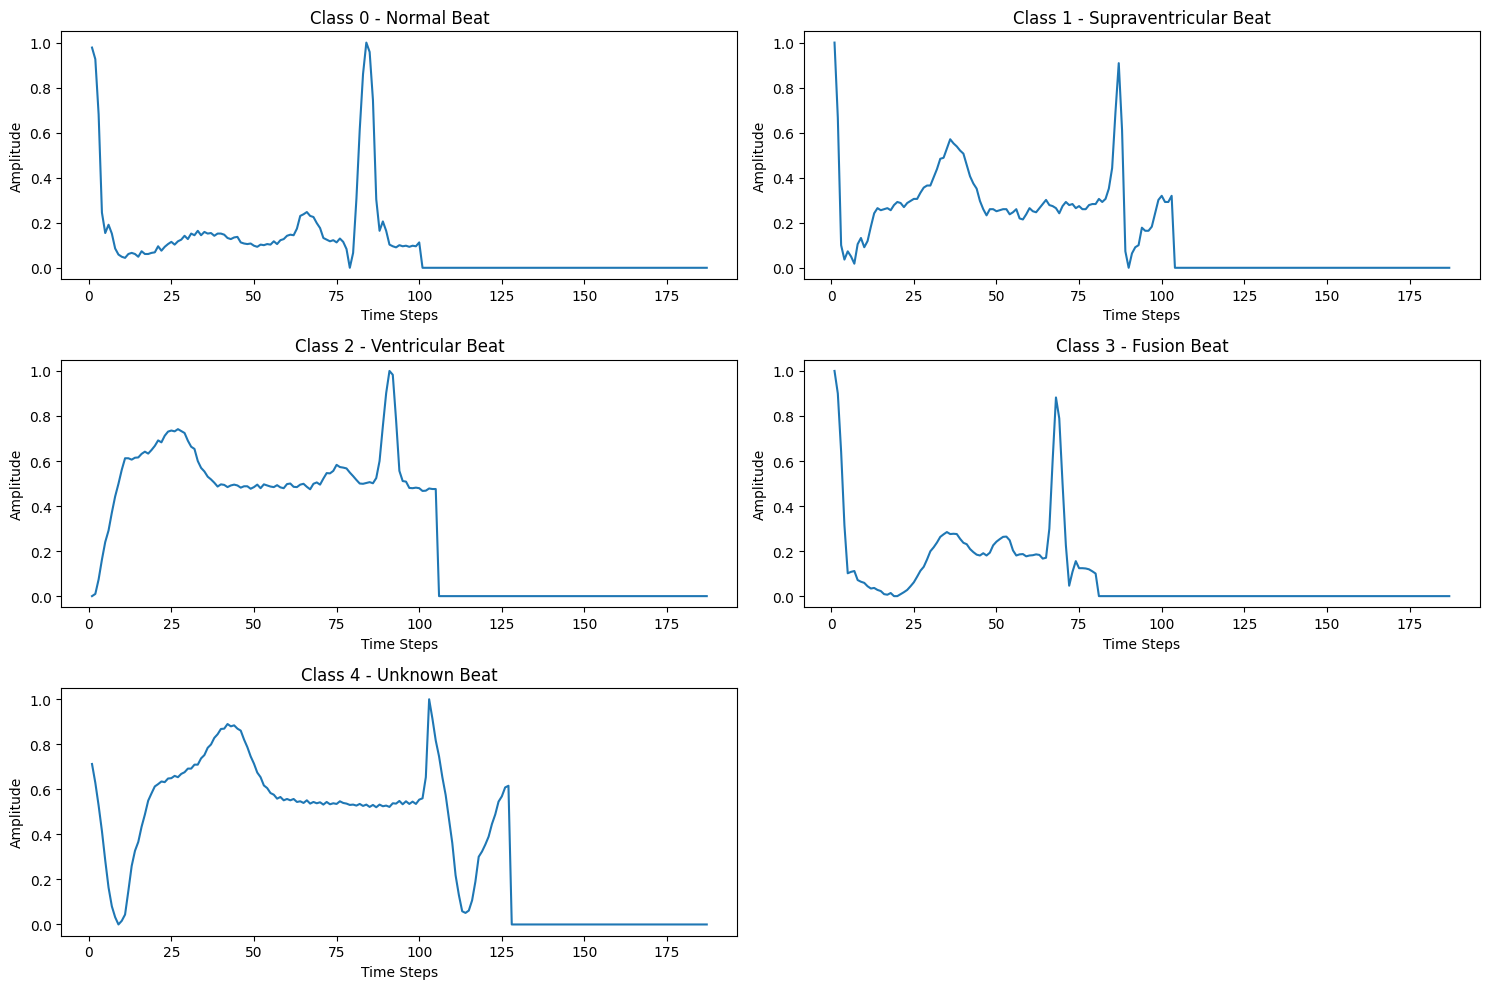

In [31]:
plt.figure(figsize=(15, 10))

# Plot one example from each class
for label in range(5):
    plt.subplot(3, 2, label + 1)
    sample = train_df[train_df.iloc[:, -1] == label].iloc[0, :-1]
    plt.plot(sample)
    plt.title(f"Class {label} - {['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown'][label]} Beat")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

## 🎨 Dynamic ECG Visualization with Bokeh

In [33]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
import pandas as pd
import numpy as np

# Load the dataset
# train_df = pd.read_csv('mitbih_train.csv', header=None)

# Select one sample for each class
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']
samples = [train_df[train_df.iloc[:, -1] == i].iloc[0, :-1].values for i in range(5)]

# Output to Jupyter Notebook
output_notebook()

# Create a Bokeh figure
p = figure(
    title="Interactive ECG Signals for Each Class",
    x_axis_label='Time Steps',
    y_axis_label='Amplitude',
    width=900,
    height=500,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Add hover tool
hover = HoverTool(tooltips=[("Time Step", "$index"), ("Amplitude", "@y")])
p.add_tools(hover)

# Add lines for each class
colors = ['blue', 'green', 'red', 'orange', 'purple']
time_steps = np.arange(len(samples[0]))  # Convert range to numpy array for x-axis

for i, sample in enumerate(samples):
    p.line(time_steps, sample, legend_label=f'Class {i} - {class_labels[i]}', color=colors[i], line_width=2)

# Customize the legend
p.legend.title = "ECG Classes"
p.legend.location = "top_right"

# Show the plot
show(p)

## 📝 Observations

- **Normal Beats (Class 0)** typically have a regular, consistent pattern.

- **Supraventricular Ectopic Beats (Class 1)** may show variations in the P-wave (abnormal P-waves).

- **Ventricular Ectopic Beats (Class 2)** often have a wider QRS complex.

- **Fusion Beats (Class 3)** show a mix of normal and abnormal features.

- **Unknown Beats (Class 4)** exhibit irregular patterns.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Statistical Analysis of Features

## ✅ Descriptive Statistics

Get basic statistics (mean, standard deviation, etc.) for the signal values.

In [34]:
train_stats = train_df.describe()
print(train_stats)

                  1             2             3             4             5  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  6             7             8             9            10  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0.178481      0.177240    

### 📝 Typical Output of `train_df.describe()`

Here's an example of what the output might look like:

|  | 1 | 2 | 3 | ... | 186 | 187 |
| : | : | : | : | : | : | : |
| **count** | 87554.0 | 87554.0 | 87554.0 | ... | 87554.0 | 87554.0 |
| **mean** | 0.118 | 0.235 | 0.362 | ... | 0.000 | 1.234 |
| **std** | 0.154 | 0.128 | 0.214 | ... | 0.012 | 0.678 |
| **min** | 0.000 | 0.000 | 0.005 | ... | 0.000 | 0.000 |
| **25%** | 0.050 | 0.150 | 0.280 | ... | 0.000 | 0.600 |
| **50%** | 0.110 | 0.220 | 0.350 | ... | 0.000 | 1.000 |
| **75%** | 0.180 | 0.310 | 0.420 | ... | 0.000 | 1.800 |
| **max** | 1.000 | 1.000 | 1.000 | ... | 0.100 | 2.500 |

### 📌 Explanation of Each Statistic

1. **Count**

    - **What it is:**
        - The number of **non-missing values** for each column.
    - **Why it matters:**
        - Helps confirm if there are any **missing values** in the dataset. In this case, 87554 indicates there are no missing values for each feature (since the training dataset has 87,554 samples).

2. **Mean**

    - **What it is:**
        - The **average value** for each column.
        - Calculated as:
            
            $\text{Mean} = \frac {\text{Sum of all values}}{\text{Number of values}}$
    - **Why it matters:**
        - Gives a sense of the **central tendency** of each feature.
        - For ECG signals, it tells you the average amplitude of each time step.

3. **Standard Deviation (std)**

    - **What it is:**
        - Measures the **spread or variability** of the values.
        - A higher standard deviation means the values are **more spread out**.
    - **Why it matters:**
        - Helps identify if the feature values are **consistent** or **vary widely**.
        - For example, a standard deviation close to 0 indicates that the values are very similar.

4. **Minimum (min)**

    - **What it is:**
        - The **smallest value** in each column.
    - **Why it matters:**
        - Helps identify the **lower bound** of the feature values.
        - Useful for detecting **outliers** or understanding the range of the signal.

5. **25th Percentile (25%)**

    - **What it is:**
        - The value below which **25%** of the data falls.
        - Also known as the **first quartile (Q1)**.
    - **Why it matters:**
        - Gives an idea of the **lower range** of the data.
        - Helps understand the distribution and skewness of the data.

6. **50th Percentile (50%)**

    - **What it is:**
        - The **median value** (the middle value when data is sorted).
        - **50%** of the data falls below this value.
    - **Why it matters:**
        - Provides a robust measure of the **central tendency**, less affected by outliers compared to the mean.

7. **75th Percentile (75%)**

    - **What it is:**
        - The value below which **75%** of the data falls.
        - Also known as the **third quartile (Q3)**.
    - **Why it matters:**
        - Indicates the **upper range** of the data.
        - Helps understand the spread and potential skewness.

8. **Maximum (max)**

    - **What it is:**
        - The **largest value** in each column.
    - **Why it matters:**
        - Helps identify the **upper bound** of the feature values.
        - Useful for detecting **outliers** or understanding the range of the signal.

### 📝 Interpreting the Output for ECG Data

Let's go through the interpretation of these statistics in the context of **ECG signals**:

1. **Count:**
    - All columns have `87554` entries, meaning **no missing data** in the training set.

2. **Mean:**
    - The average values for each time step are relatively small (e.g., `0.118`, `0.235`), reflecting the typical range of ECG signal amplitudes.

3. **Standard Deviation (std):**
    - Small standard deviations (e.g., `0.154`, `0.128`) suggest that the ECG signal values are **consistent** and do not vary wildly.

4. **Min/Max:**
    - The minimum (`0.000`) and maximum (`1.000`) values show that the signals are likely normalized or scaled between `0` and `1`.

5. **Percentiles:**
    - The **25th, 50th (median), and 75th percentiles** give a clear picture of how the signal values are distributed.
    - For example, if the **median** (50%) value is `0.110` and the **75th percentile** is `0.180`, it indicates that most values are clustered within this range.

## ✅ Signal Value Distribution

Now, we want to visualize how the **ECG signal values are distributed** across the dataset. This helps to understand the **range of values**, their **frequency**, and whether the data is **skewed or balanced**.

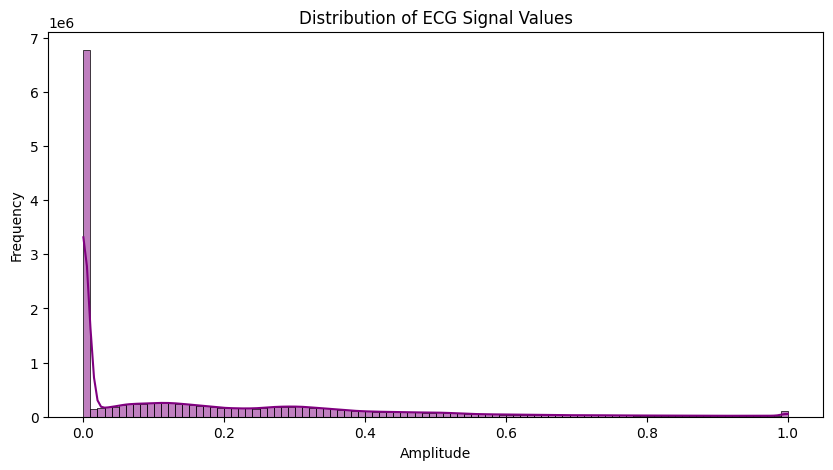

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df.iloc[:, :-1].values.flatten(), bins=100, kde=True, color='purple')
plt.title("Distribution of ECG Signal Values")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.show()

### 📊 What the Plot Shows

1. **Histogram:**

    - The bars in the histogram show how many times each amplitude value appears in the dataset.
    
    - The **x-axis** represents the **ECG signal amplitudes** (the electrical signal values).
    
    - The **y-axis** represents the **frequency** (how many times those amplitude values occur).

2. **KDE Curve:**

    - The smooth purple line represents the **probability distribution** of the signal values.
    
    - The KDE curve helps you see the **shape of the distribution** more clearly (e.g., is it symmetric, skewed, or multi-peaked?).

### 🧐 Interpreting the Plot

1. **Range of Values:**

    - The x-axis shows the range of ECG signal amplitudes, typically between **0 and 1** if the data is normalized.
    
    - This indicates that the signals have been **scaled or normalized** to fall within a fixed range.

2. **Distribution Shape:**

    - If the histogram shows a **single peak**, the data is likely **normally distributed**.
    
    - If it shows **multiple peaks**, it might indicate different types of heartbeats or variations in the ECG patterns.
    
    - If the distribution is **skewed**, it means there are more low or high amplitude values.

3. **Frequency:**

    - The y-axis shows how often each amplitude value appears.
    
    - For example, if most of the bars are clustered around a specific range (e.g., between **0.0 and 0.1**), it suggests that most ECG signals fall within that amplitude range.

### 📝 Key Takeaways

1. **Understanding the Data:**

    - This plot helps you understand the overall **distribution** and **range** of ECG signal values.
    
    - You can quickly see if the data has been **normalized** or if there are any **outliers**.

2. **Model Preparation:**

    - Knowing the distribution helps in choosing appropriate **preprocessing steps** (e.g., normalization or scaling).
    
    - It also informs decisions about **model architecture** (e.g., handling outliers or skewed data).

3. **Detecting Issues:**

    - If the distribution has unexpected peaks or gaps, it might indicate **data quality issues** or the presence of **noise**.

## ✅ Box Plot for Signal Values

A **box plot** (also known as a **box-and-whisker plot**) is a visualization tool that shows the **distribution of numerical data** and helps to identify **outliers**. In the context of ECG signals, a box plot helps us understand how the **amplitudes of ECG signal values** are spread across the **different time steps**.

When we have a large number of time steps (e.g., **187 time steps** for each heartbeat), a box plot can efficiently summarize the distribution of values at each time step, showing:

- **Median** (middle value)
- **Interquartile Range (IQR)** (spread of the middle 50% of data)
- **Whiskers** (range of most of the data)
- **Outliers** (extreme values that are far from the rest of the data)

This visualization is particularly useful for identifying how consistent or variable the ECG signal amplitudes are across different time steps.

### 📈 Strategy 1: Plot Time Steps in Batches

This approach divides the time steps into smaller, more manageable batches and creates separate box plots for each batch.

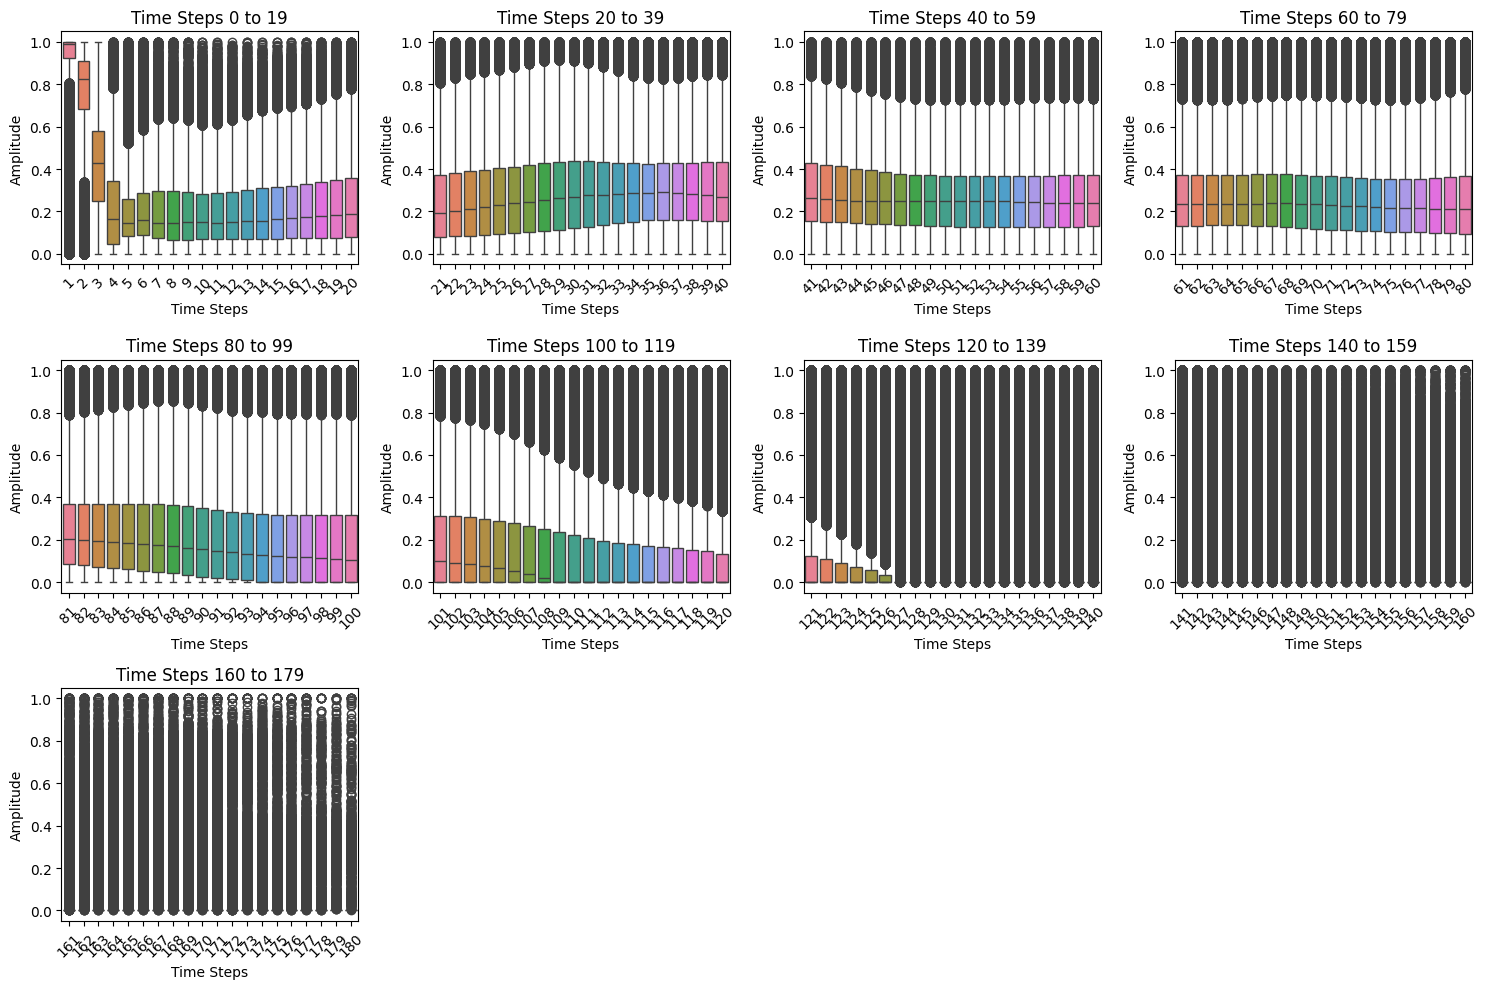

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of time steps per batch
batch_size = 20

# Calculate the number of batches
num_batches = train_df.shape[1] // batch_size

# Plot box plots for each batch of time steps
plt.figure(figsize=(15, 10))
for i in range(num_batches):
    start_col = i * batch_size
    end_col = (i + 1) * batch_size
    plt.subplot(3, 4, i + 1)  # Create a grid of subplots (3 rows, 4 columns)
    sns.boxplot(data=train_df.iloc[:, start_col:end_col])
    plt.title(f"Time Steps {start_col} to {end_col - 1}")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

**Explanation:**

- **Batch Size:** Each batch contains 20 time steps.
    
- **Subplots:** We create a grid of subplots (3 rows and 4 columns) to display multiple batches.
    
- **Rotation:** x-axis labels are rotated by 45 degrees for better readability.
    
- **Tight Layout:** Ensures subplots do not overlap.

### 📈 Strategy 2: Plot a Subsample of Time Steps

Instead of plotting all 187 time steps, let's plot every **10th time step** to reduce clutter.

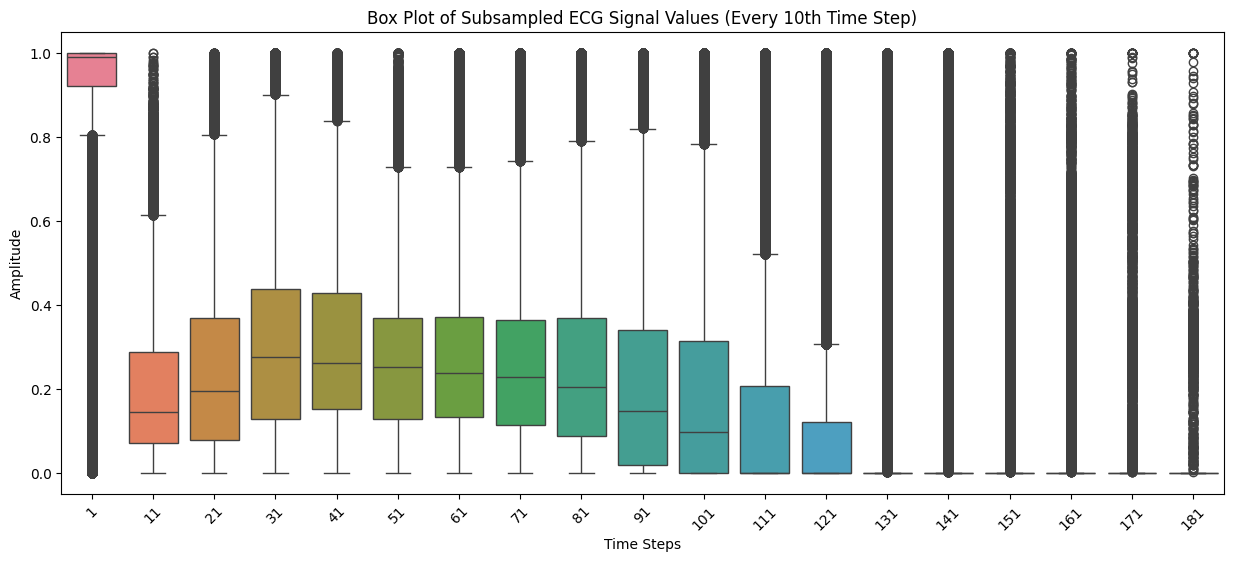

In [37]:
plt.figure(figsize=(15, 6))

# Select every 10th time step
selected_columns = train_df.columns[::10]

sns.boxplot(data=train_df[selected_columns])
plt.title("Box Plot of Subsampled ECG Signal Values (Every 10th Time Step)")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

**Explanation:**

- **Subsampling:** We select every 10th column (::10) from the dataset.
    
- **Box Plot:** Plots the subsampled columns to reduce clutter.
    
- **Rotation:** x-axis labels are rotated by 45 degrees for better readability.

### 🎨 Comparison of Both Strategies

- **Strategy 1 (Batches):** Provides a detailed look at all the time steps by dividing them into smaller chunks. Suitable when you want to explore all time steps.

- **Strategy 2 (Subsampling):** Offers a quick overview of the data by reducing the number of time steps plotted. Useful for a high-level summary.

### 📊 What the Plot Shows

1. **Median Line:**

    - The **bold horizontal line** inside each box represents the **median** (50th percentile) of the data for that time step.

2. **Box:**

    - The **box** spans from the **25th percentile (Q1) to the 75th percentile (Q3)**, representing the **Interquartile Range (IQR)**.
    - The IQR contains the **middle 50%** of the data.

3. **Whiskers:**

    - The **lines extending from the box** (called whiskers) show the range of data within **1.5 times the IQR** from Q1 and Q3.
    - Most data points fall within the whiskers.

4. **Outliers:**

    - **Dots or circles** outside the whiskers represent **outliers** (data points that are significantly different from the rest).

5. **X-Axis:**

    - Represents the **time steps** of the ECG signal (e.g., Time Step 1, 2, 3, ..., 187).

6. **Y-Axis:**

    - Represents the **amplitude values** of the ECG signal.

### 🧐 Interpreting the Plot

### 📝 Key Takeaways

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 6. Detecting Imbalances and Outliers

## ✅ Class Imbalance Visualization

<ipython-input-38-67cf872c2031>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_labels, palette='viridis')


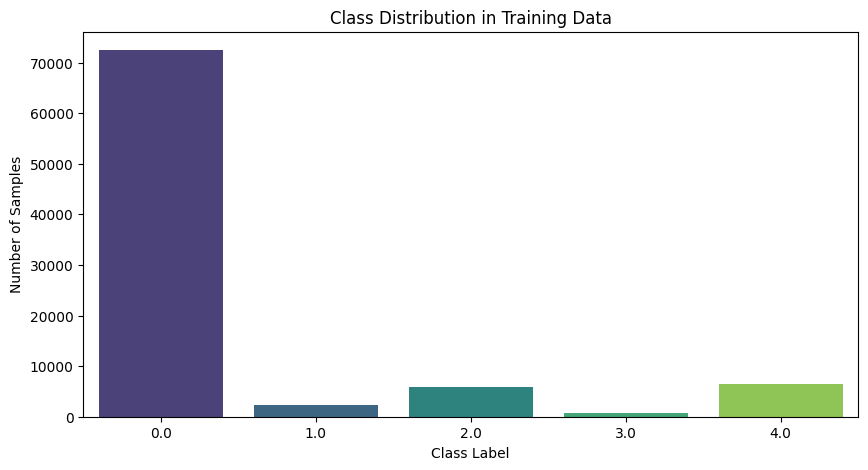

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(x=train_labels, palette='viridis')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

<ipython-input-39-91d9a7105431>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_labels, palette='viridis')


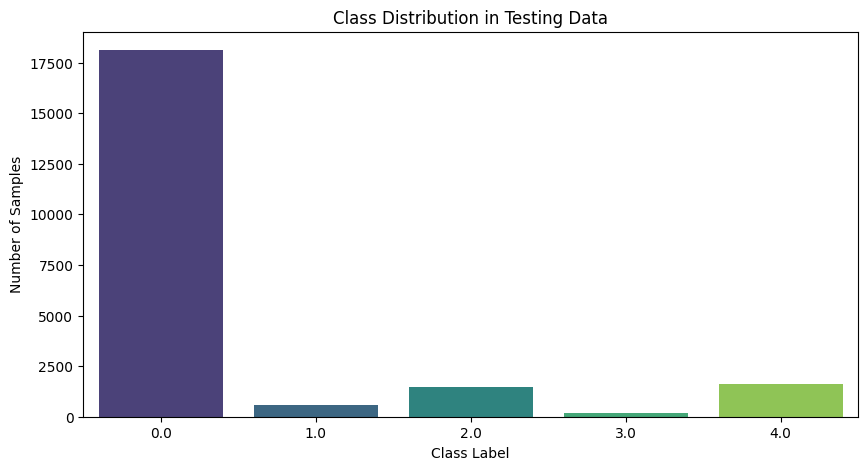

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(x=test_labels, palette='viridis')
plt.title("Class Distribution in Testing Data")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

## ✅ Outlier Detection Using Z-Score

Calculate the **Z-scores** to detect outliers in the ECG signals.

In [45]:
z_scores = zscore(train_df.iloc[:, :-1], axis=0)
outlier_indices = np.where(np.abs(z_scores) > 3)[0]
print(f"Number of Outliers Detected: {len(outlier_indices)}")

Number of Outliers Detected: 302579


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 7. Handling Class Imbalance in the ECG Dataset

Class imbalance is a common issue in datasets where some classes (categories) have significantly **fewer samples** compared to others. In the context of the **ECG Heartbeat Categorization Dataset**, this imbalance can cause our machine learning or deep learning model to perform poorly, especially on the minority classes. For example, if **"Normal Beats"** vastly outnumber **"Fusion Beats"**, the model might be biased towards predicting "Normal Beats" more frequently.

🔍 **Why Class Imbalance is a Problem**

1. **Bias Toward Majority Class:** The model might predict the majority class most of the time, ignoring minority classes.
    
2. **Poor Generalization:** The model fails to learn the features of underrepresented classes, leading to poor performance.
    
3. **Skewed Evaluation Metrics:** Accuracy can be misleading. A model predicting only the majority class can still show high accuracy.

To address class imbalance, we can use techniques like **resampling**, **class weighting**, and other strategies. Let's explore these techniques in detail.

## 🔄 1. Resampling Techniques

Resampling involves modifying the dataset to balance the number of samples in each class. There are two primary types of resampling:

### ✅ 1.1 Oversampling

**What is Oversampling?**

Oversampling **increases the number of samples in the minority classes** by creating duplicate samples or generating synthetic data. This helps ensure the model has enough examples to learn from each class.

**📌 Techniques for Oversampling**

1. **Random Oversampling:**
    
    - **Method:** Randomly duplicate samples from the minority class.
        
    - **Pros:** Simple and effective.
        
    - **Cons:** May lead to **overfitting** because the model sees the same minority samples multiple times.

    -
    ```
    # Random Oversampling

    from imblearn.over_sampling import RandomOverSampler
    from collections import Counter

    # Create an oversampler
    oversampler = RandomOverSampler(random_state=42)

    # Apply oversampling
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

    # Check the new class distribution
    print(Counter(y_resampled))
    ```

2. **SMOTE (Synthetic Minority Oversampling Technique):**
    
    - **Method:** Generates synthetic samples for the minority class by interpolating between existing samples.
    
    - **Pros:** Reduces overfitting compared to random oversampling.
    
    - **Cons:** Might create unrealistic synthetic data in complex datasets.
    -
    ```
    # SMOTE (Synthetic Minority Oversampling Technique)

    from imblearn.over_sampling import SMOTE

    # Create a SMOTE oversampler
    smote = SMOTE(random_state=42)

    # Apply SMOTE
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Check the new class distribution
    print(Counter(y_resampled))
    ```

### ✅ 1.2 Undersampling

**What is Undersampling?**

Undersampling **reduces the number of samples in the majority class** to balance the dataset. It helps reduce bias but can lead to loss of valuable information.

**📌 Techniques for Undersampling**

1. **Random Undersampling:**
    
    - **Method:** Randomly remove samples from the majority class.
        
    - **Pros:** Quick and easy.
        
    - **Cons:** Risk of **losing important information** from the majority class.

    -
    ```
    # Random Undersampling

    from imblearn.under_sampling import RandomUnderSampler

    # Create an undersampler
    undersampler = RandomUnderSampler(random_state=42)

    # Apply undersampling
    X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

    # Check the new class distribution
    print(Counter(y_resampled))
    ```

2. **Tomek Links:**
    
    - **Method:** Removes samples from the majority class that are close to minority class samples.
    
    - **Pros:** Helps clean the decision boundary between classes.
    
    - **Cons:** Less effective for severe imbalances.
    -
    ```
    # Tomek Links

    from imblearn.under_sampling import TomekLinks

    # Create a Tomek Links undersampler
    tomek = TomekLinks()

    # Apply Tomek Links
    X_resampled, y_resampled = tomek.fit_resample(X_train, y_train)

    # Check the new class distribution
    print(Counter(y_resampled))
    ```

## ⚖️ 2. Class Weighting

- **What is Class Weighting?**

    Class weighting assigns higher penalties (weights) to misclassifications of minority class samples during model training. This encourages the model to pay more attention to the minority class.

- **📌 How It Works**

    - In deep learning frameworks like **Keras** or **TensorFlow**, you can set class weights during model training.
    
    - The model will give more importance to the minority class, reducing bias toward the majority class.

- **Example in Keras:**

    ```
    from sklearn.utils import class_weight
    import numpy as np

    # Calculate class weights
    class_weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )

    # Convert to dictionary format for Keras
    class_weights_dict = dict(enumerate(class_weights))

    print(f"Class Weights: {class_weights_dict}")

    # Train the model with class weights
    model.fit(X_train, y_train, class_weight=class_weights_dict, epochs=20, batch_size=32)
    ```

- **Pros and Cons of Class Weighting**

    - **Pros:** No need to modify the dataset; avoids overfitting caused by duplicate data.
    
    - **Cons:** May require careful tuning; may not be as effective as resampling for extreme imbalance.

## 🔧 3. Hybrid Approaches

Sometimes, combining multiple techniques can yield better results. For example:

1. **Oversampling + Class Weighting:** Use SMOTE to create synthetic samples and also apply class weights during training.
    
2. **Undersampling + SMOTE:** Undersample the majority class and then use SMOTE to balance the minority classes.

    ```
    from imblearn.combine import SMOTETomek

    # Combine SMOTE and Tomek Links
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

    print(Counter(y_resampled))
    ```

## 📊 Choosing the Right Technique

| Technique | When to Use | Pros | Cons |
| :-------- | :---------- | :--- | :--- |
| Random Oversampling | Moderate imbalance; simple datasets | Easy to implement | Risk of overfitting |
| SMOTE | Severe imbalance; complex datasets | Reduces overfitting compared to oversampling | Synthetic data may be unrealistic |
| Random Undersampling | Large majority class; quick fixes | Reduces dataset size | Loss of valuable information |
| Tomek Links | Imbalance near class boundaries; noisy datasets | Cleans the decision boundary | May not handle severe imbalance |
| Class Weighting | Large datasets; deep learning models | No data duplication | Needs careful tuning |
| Hybrid Methods | Extreme imbalance; complex problems | Combines strengths of multiple methods | More complex implementation |

## 🚀 Summary

1. **Resampling** techniques modify the dataset by duplicating or removing samples to balance the classes.

2. **Class Weighting** adjusts the importance of each class during training to reduce bias toward the majority class.

3. **Hybrid Approaches** combine multiple methods to tackle severe imbalances effectively.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 8. Advanced Visualizations

## ✅ Animated Visualization of Heartbeats

Create an animated plot of a heartbeat signal.

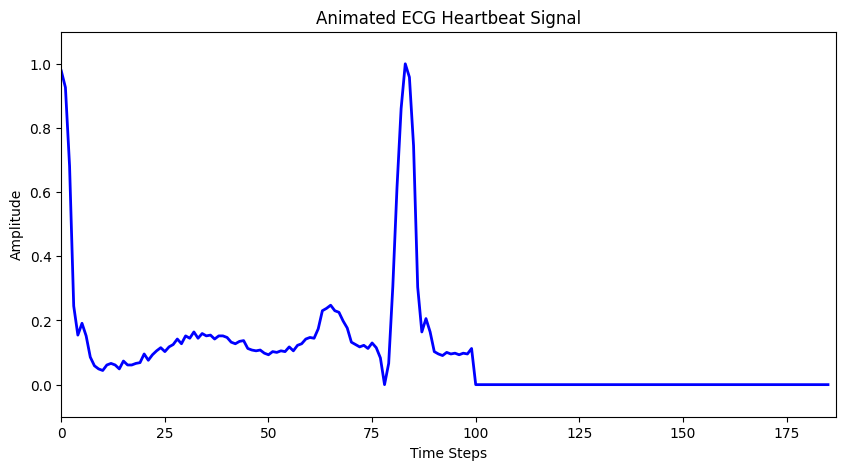

In [46]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Select a sample heartbeat (e.g., the first sample)
heartbeat = train_df.iloc[0, :-1].values

# Create the figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, len(heartbeat))
ax.set_ylim(min(heartbeat) - 0.1, max(heartbeat) + 0.1)
ax.set_title("Animated ECG Heartbeat Signal")
ax.set_xlabel("Time Steps")
ax.set_ylabel("Amplitude")

# Initialize the line object
line, = ax.plot([], [], lw=2, color='blue')

# Initialize function for the animation
def init():
    line.set_data([], [])
    return line,

# Update function for the animation
def update(frame):
    line.set_data(np.arange(frame), heartbeat[:frame])
    return line,

# Create the animation (100 frames, updating every 50 milliseconds)
ani = FuncAnimation(fig, update, frames=len(heartbeat), init_func=init, blit=True, interval=10)

# Display the animation in the notebook
HTML(ani.to_jshtml())

**Explanation of the Code**

1. **Loading the Dataset:**
    - Load the `mitbih_train.csv` file.
    - Select the first row (heartbeat) and exclude the last column (label).

2. **Creating the Plot:**
    - Set up a figure and axis with appropriate limits and labels.
    - Initialize an empty line for the plot.

3. **Animation Functions:**
    - `init()`: Initializes the line object with no data.
    - `update(frame)`: Updates the line by plotting data up to the current frame.

4. **Animation Parameters:**
    - `frames=len(heartbeat)`: The number of frames matches the number of time steps (187).
    - `interval=10`: The delay between frames in milliseconds.

5. **Displaying the Animation:**
    - `HTML(ani.to_jshtml())`: Converts the animation to JavaScript HTML for display in Jupyter Notebooks.

## ✅ Correlation Heatmap

Given that the dataset contains **187 time steps**, plotting a heatmap for the full correlation matrix can make the axes cluttered and unreadable. To solve this issue, we'll use the following strategies:

1. **Subsampling:** Instead of showing correlations for all 187 time steps, we'll select every **10th time step** to reduce the number of columns and rows.
    
2. **Annotate the Heatmap:** Add annotations to make it easier to interpret the correlations.
    
3. **Adjust Figure Size:** Increase the figure size for better visualization.
    
4. **Color Scaling:** Use a color scale that clearly differentiates positive and negative correlations.

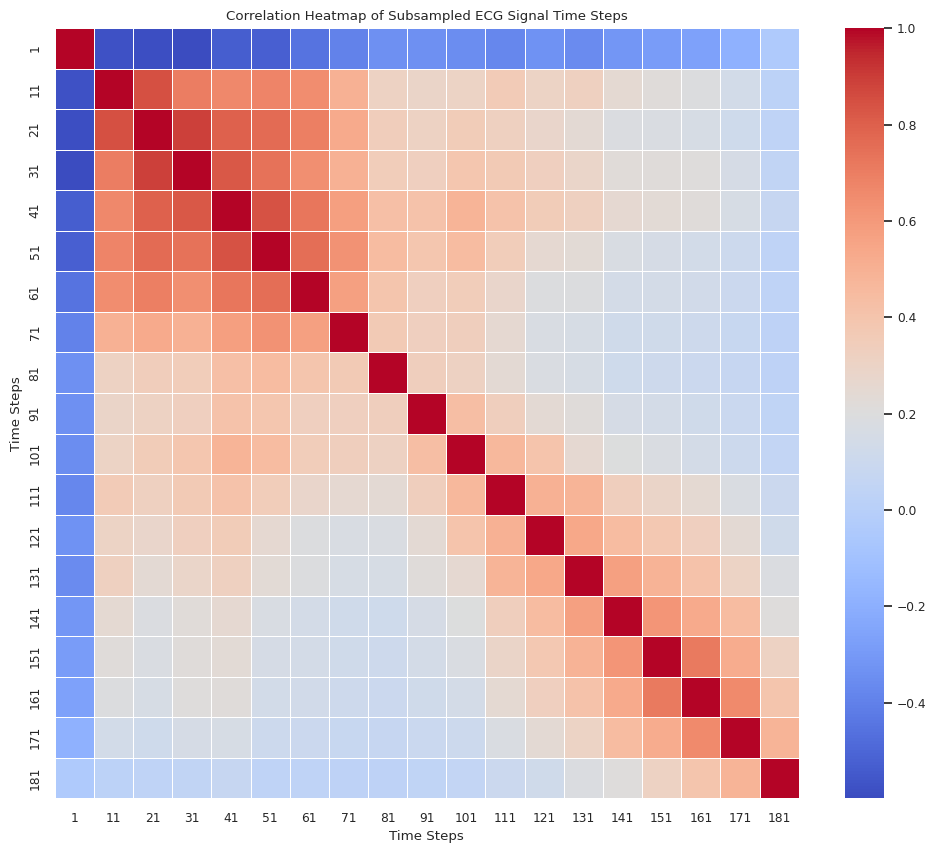

In [47]:
# Extract ECG signal data (excluding the label column)
ecg_data = train_df.iloc[:, :-1]

# Subsample: Select every 10th time step to reduce clutter
subsampled_data = ecg_data.iloc[:, ::10]

# Compute the correlation matrix for the subsampled data
correlation_matrix = subsampled_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.8)
heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,             # Set to True for annotations if needed
    cmap='coolwarm',         # Color scale: blue for negative, red for positive correlations
    linewidths=0.5,          # Add space between cells for clarity
    xticklabels=subsampled_data.columns,  # Display selected columns
    yticklabels=subsampled_data.columns
)

# Add titles and labels
plt.title("Correlation Heatmap of Subsampled ECG Signal Time Steps")
plt.xlabel("Time Steps")
plt.ylabel("Time Steps")

# Display the plot
plt.show()

**Explanation of the Code**

1. **Subsampling:**

    - We select every **10th time step** using `ecg_data.iloc[:, ::10]`. This reduces the 187 time steps to just 19, making the heatmap easier to read.

2. **Correlation Matrix:**

    - The correlation matrix is computed using `subsampled_data.corr()`.

3. **Heatmap Parameters:**

    - `annot=False`: Set to `True` if you want numerical annotations inside the heatmap cells (but this can be cluttered with too many values).
    
    - `cmap='coolwarm'`: Blue for negative correlations, red for positive correlations.
    
    - `linewidths=0.5`: Adds spacing between cells for clarity.

4. **Figure Size and Font Scale:**

    - **Figure Size:** `plt.figure(figsize=(12, 10))` makes the plot large enough to visualize details.
    
    - **Font Scale:** `sns.set(font_scale=0.8)` ensures the labels are readable.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 9. Summary of Dataset Insights

## 📝 Key Findings

1. **No Missing Values:** The dataset is clean and ready for analysis.

2. **Class Imbalance:** Some classes (e.g., Normal Beats) have significantly more samples than others (e.g., Fusion Beats).

3. **Distinct ECG Patterns:** Each class has unique characteristics (e.g., QRS width).

4. **Signal Range:** The amplitude of ECG signals varies between approximately **-1 and 1**.

5. **Outliers:** Some potential outliers may need handling.

## 🧩 Next Steps

1. **Data Preprocessing:** Normalize data, handle class imbalance, and remove outliers.

2. **Model Building:** Develop Deep Learning models (CNN, LSTM, and hybrid models) for heartbeat classification.

3. **Evaluation and Comparison:** Use appropriate metrics to evaluate and compare model performance.

4. **Deployment:** Deploy the best model for real-world use cases.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)